# Evaluated project 3

In [8]:
# Import libraries
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [16]:
# Read csv file and convert into dataframe
data= pd.read_csv("C:/Users/Admin/Downloads/ibm-hr-analytics-employee-attrition-performance (1)/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [17]:
# number of rows and column
data.shape

(1470, 35)

In [18]:
#getting some information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [19]:
#checking null values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [20]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [21]:
# Conclusion:  We have total 1470 records, No null values present

# FEATURES ARE OF CATEGORICAL type while 26 are of Integer type
data.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [22]:
#Age and leaving company
data['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

In [24]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Count'>

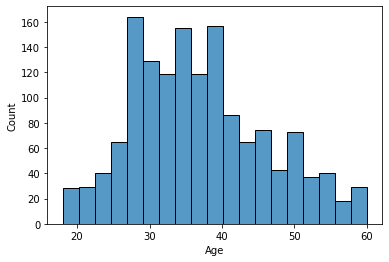

In [25]:
sns.histplot(data['Age'])

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

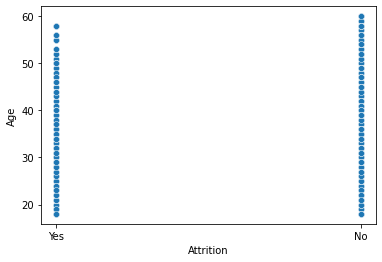

In [26]:
sns.scatterplot(x='Attrition',y='Age', data=data)

<AxesSubplot:xlabel='Age', ylabel='Attrition'>

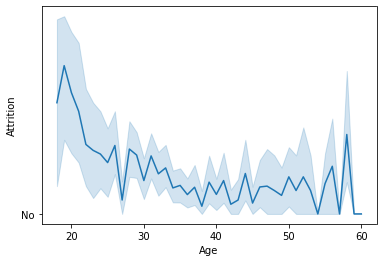

In [27]:
sns.lineplot(x='Age',y='Attrition',data=data)

<AxesSubplot:>

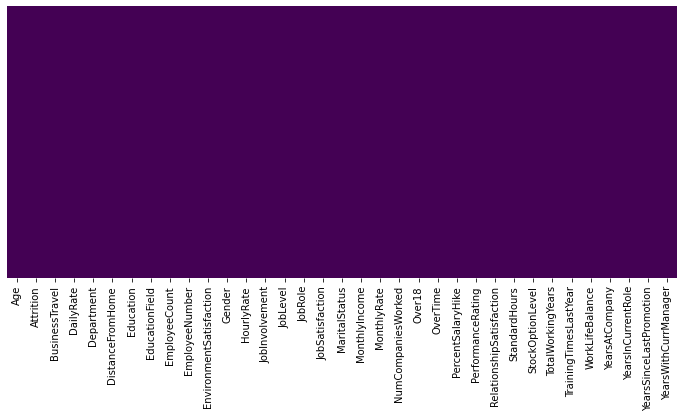

In [28]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Attrition', ylabel='count'>

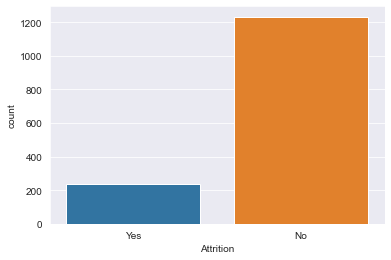

In [29]:
#So, we can see that there are no missing values in the dataset.
# This is binary classification problem, lets distribute target variable
sns.set_style('darkgrid')
sns.countplot(x='Attrition', data=data)

In [30]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

([<matplotlib.patches.Wedge at 0x1fa1806d340>,
 [Text(-1.0930587195656423, 0.606401381579494, 'No'),
  Text(0.961891673217765, -0.5336332157899547, 'Yes')],
 [Text(-0.6558352317393852, 0.3638408289476963, '83.88%'),
  Text(0.5246681853915082, -0.2910726631581571, '16.12%')])

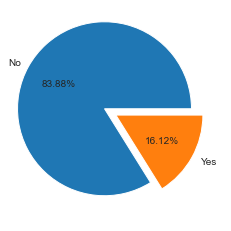

In [31]:
plt.pie(data['Attrition'].value_counts().values,labels=data['Attrition'].value_counts().index,autopct='%1.2f%%',explode=(.15,0))

In [32]:
# Business Travel vs Attririon
data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

<AxesSubplot:xlabel='Attrition', ylabel='BusinessTravel'>

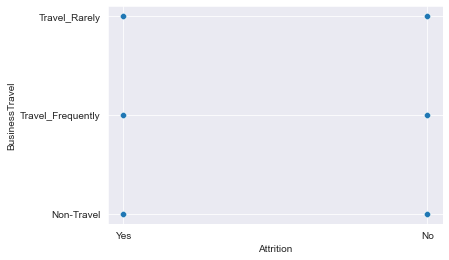

In [33]:
# how does traveling in job relatioed to job satisfaction
sns.scatterplot('Attrition','BusinessTravel', data=data)

In [34]:
data.groupby('BusinessTravel')['Attrition'].value_counts()

BusinessTravel     Attrition
Non-Travel         No           138
                   Yes           12
Travel_Frequently  No           208
                   Yes           69
Travel_Rarely      No           887
                   Yes          156
Name: Attrition, dtype: int64

In [35]:
# Rarely Travel person doing attrition more
data['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

([<matplotlib.patches.Wedge at 0x1fa180f8d30>,
 [Text(-0.6728966948858769, 0.8701781645224518, 'Travel_Rarely'),
  Text(0.36441614894376395, -1.037882878936249, 'Travel_Frequently'),
  Text(1.0439613016770868, -0.3466191001671471, 'Non-Travel')],
 [Text(-0.36703456084684194, 0.4746426351940646, '70.95%'),
  Text(0.19877244487841667, -0.5661179339652267, '18.84%'),
  Text(0.5694334372784109, -0.18906496372753476, '10.20%')])

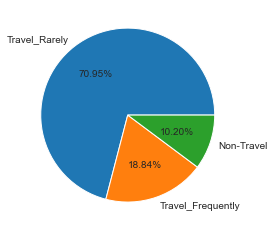

In [36]:
# In the dataset
plt.pie(data['BusinessTravel'].value_counts().values,labels=data['BusinessTravel'].value_counts().index,autopct='%1.2f%%')

In [37]:
#some person are comnfortable after doing job from office after that they 
# didnt want to go to the fiels/ travel so they changes the JOB
#DailyRate vd attrition
## Daily Rate is salary level, ofcouse it will effect Attrition but how?

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

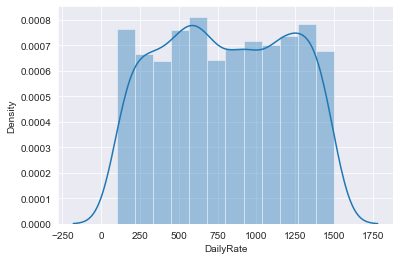

In [38]:
sns.distplot(data['DailyRate'])

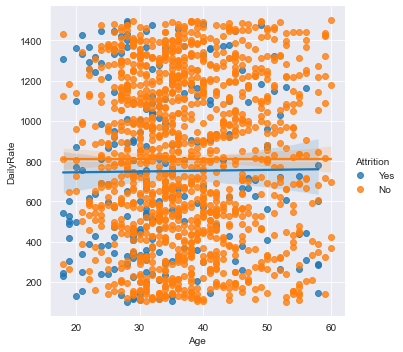

In [39]:
sns.lmplot(x = 'Age', y = 'DailyRate', hue = 'Attrition', data = data)

In [40]:
#Gender effect

data['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [41]:
# which gender is leaving job more

data.groupby('Gender')['Attrition'].value_counts()

Gender  Attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: Attrition, dtype: int64

In [42]:
# as expected, More Male are leaving jobs more than Female

In [43]:
data.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [44]:
data.groupby('Gender')['DailyRate'].mean()


Gender
Female    808.273810
Male      798.626984
Name: DailyRate, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Attrition'>

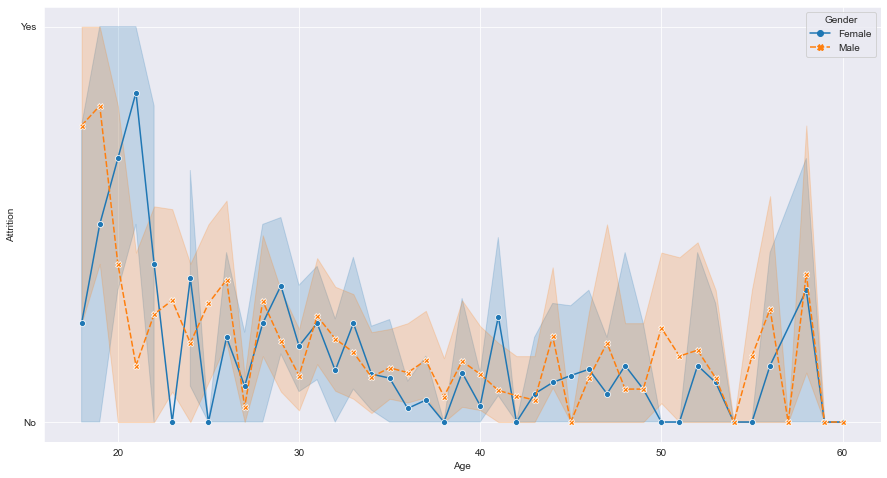

In [45]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Age',y='Attrition',hue='Gender',style='Gender',markers=True,data=data)

In [46]:
#Department vs Attrition
# Which department is less satisfied with job or have more attrition
data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [47]:
data.groupby('Department')['Attrition'].value_counts()

Department              Attrition
Human Resources         No            51
                        Yes           12
Research & Development  No           828
                        Yes          133
Sales                   No           354
                        Yes           92
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Department', ylabel='count'>

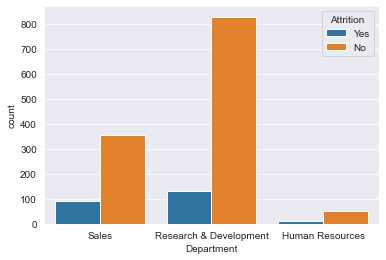

In [48]:
sns.countplot('Department',hue='Attrition',data=data)


<AxesSubplot:xlabel='Department', ylabel='DailyRate'>

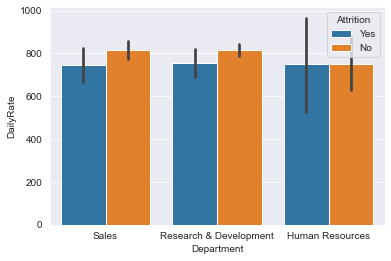

In [49]:
sns.barplot(x='Department',y='DailyRate',hue='Attrition', data=data)

In [50]:
data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

([<matplotlib.patches.Wedge at 0x1fa19f53880>,
 [Text(-0.5108751650946098, 0.9741696801325502, 'Research & Development'),
  Text(0.37548555701288383, -1.0339296864268501, 'Sales'),
  Text(1.0900447132085396, -0.1476567750091844, 'Human Resources')],
 [Text(-0.27865918096069625, 0.5313652800723001, '65.37%'),
  Text(0.20481030382520934, -0.5639616471419181, '30.34%'),
  Text(0.5945698435682942, -0.08054005909591874, '4.29%')])

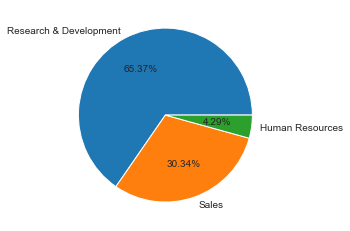

In [51]:
plt.pie(data['Department'].value_counts().values,labels=data['Department'].value_counts().index,autopct='%1.2f%%')


In [52]:
#DistanceFromHome vs Attrition
data['DistanceFromHome'].unique()

array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
       10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13], dtype=int64)

<AxesSubplot:xlabel='Age', ylabel='DistanceFromHome'>

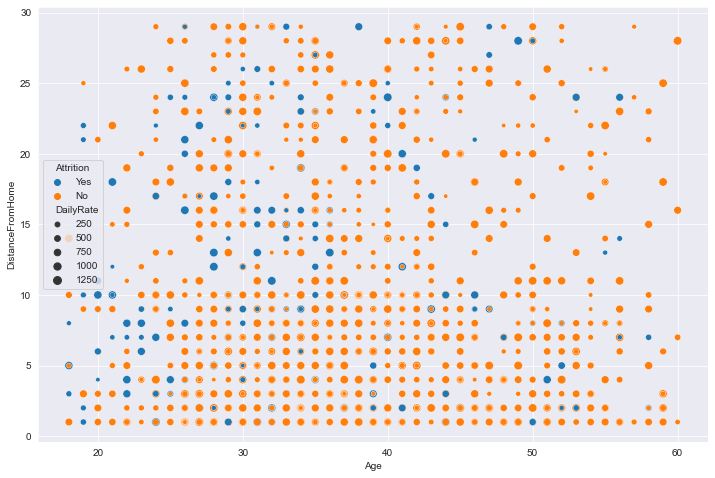

In [53]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Age',y='DistanceFromHome',hue='Attrition', size='DailyRate', data=data)

In [54]:
# From the graph, employees at early age and living far away from office are doing attrition

# As the Age increases, Attrition decreases

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

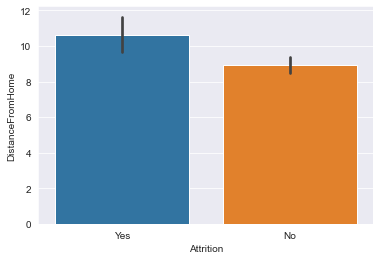

In [55]:
sns.barplot(x='Attrition',y='DistanceFromHome', data=data)


<AxesSubplot:xlabel='DistanceFromHome', ylabel='Attrition'>

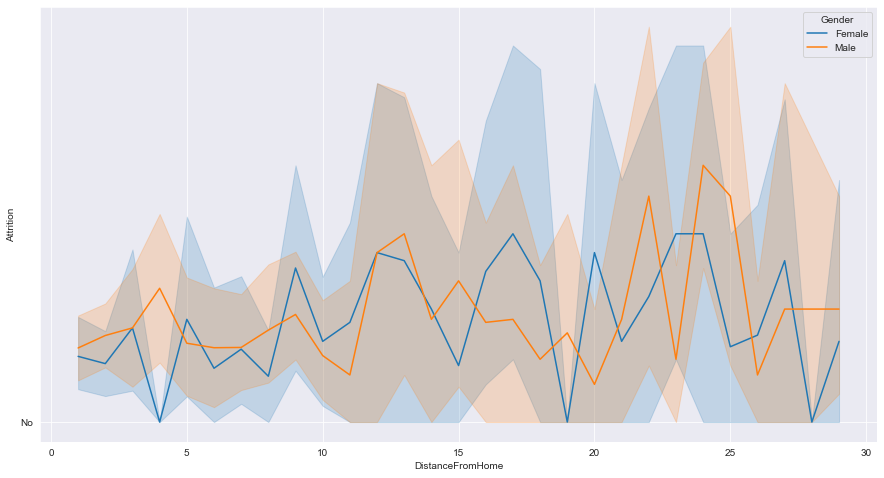

In [56]:
plt.figure(figsize=(15,8))
sns.lineplot(x='DistanceFromHome',y='Attrition',hue='Gender',markers=True,data=data)

In [57]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [59]:
#Education vs Attrition

data['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

In [61]:
data.groupby('Education')['Attrition'].value_counts()

Education  Attrition
1          No           139
           Yes           31
2          No           238
           Yes           44
3          No           473
           Yes           99
4          No           340
           Yes           58
5          No            43
           Yes            5
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

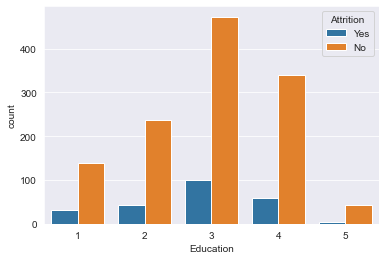

In [63]:
sns.countplot(x='Education',hue='Attrition', data=data)

In [65]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [66]:
##EducationField

data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [67]:
data.groupby('Education')['EducationField'].value_counts()

Education  EducationField  
1          Life Sciences        67
           Medical              63
           Technical Degree     19
           Marketing            14
           Other                 5
           Human Resources       2
2          Life Sciences       116
           Medical              99
           Marketing            24
           Technical Degree     22
           Other                19
           Human Resources       2
3          Life Sciences       233
           Medical             183
           Marketing            59
           Technical Degree     57
           Other                24
           Human Resources      16
4          Life Sciences       173
           Medical             104
           Marketing            52
           Other                33
           Technical Degree     31
           Human Resources       5
5          Life Sciences        17
           Medical              15
           Marketing            10
           Technical Degree

<AxesSubplot:xlabel='EducationField', ylabel='count'>

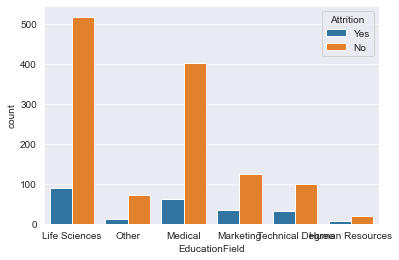

In [69]:
sns.countplot(data['EducationField'],hue='Attrition',data=data)

In [70]:
# If jobs count are more, then accordingly attrition is also more
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [72]:
##EmployeeCount

data['EmployeeCount'].unique()

array([1], dtype=int64)

In [73]:
data['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [74]:
# This feature will not contribute to find attrition as it have same information in all rexcords, we can drop this

<AxesSubplot:xlabel='EmployeeCount', ylabel='count'>

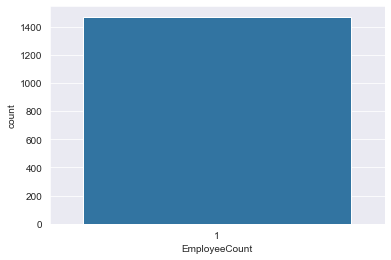

In [75]:
sns.countplot(df['EmployeeCount'])

In [76]:
#EmployeeNumber

data['EmployeeNumber'].value_counts()

1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: EmployeeNumber, Length: 1470, dtype: int64

In [77]:
# This is Employee ID , which is unique for every feature, This will not contributue to pridict Attrition, we can drop this as well

In [78]:
##EnvironmentSatisfaction

data['EnvironmentSatisfaction'].unique

<bound method Series.unique of 0       2
1       3
2       4
3       4
4       1
       ..
1465    3
1466    4
1467    2
1468    4
1469    2
Name: EnvironmentSatisfaction, Length: 1470, dtype: int64>

In [79]:
# This is ordinal categorical feature

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

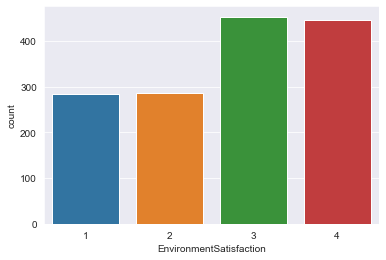

In [80]:
sns.countplot(data['EnvironmentSatisfaction'],data=data)


In [81]:
#  Less EnvironmentalSatifaction.,,  more Attrition
##HourlyRate

data['HourlyRate'].unique()

array([ 94,  61,  92,  56,  40,  79,  81,  67,  44,  84,  49,  31,  93,
        50,  51,  80,  96,  78,  45,  82,  53,  83,  58,  72,  48,  42,
        41,  86,  97,  75,  33,  37,  73,  98,  36,  47,  71,  30,  43,
        99,  59,  95,  57,  76,  87,  66,  55,  32,  52,  70,  62,  64,
        63,  60, 100,  46,  39,  77,  35,  91,  54,  34,  90,  65,  88,
        85,  89,  68,  69,  74,  38], dtype=int64)

<AxesSubplot:xlabel='HourlyRate', ylabel='Attrition'>

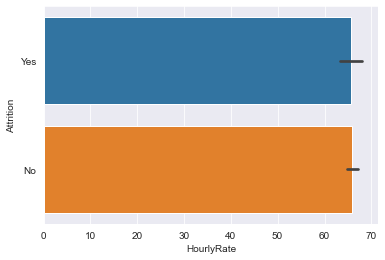

In [82]:
sns.barplot(df['HourlyRate'],df['Attrition'], data=data)

In [83]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [84]:
## JobInvolvement


data['JobInvolvement'].unique()

array([3, 2, 4, 1], dtype=int64)

In [85]:
# More level means more involvement
data.groupby('JobInvolvement')['JobInvolvement'].value_counts()

JobInvolvement  JobInvolvement
1               1                  83
2               2                 375
3               3                 868
4               4                 144
Name: JobInvolvement, dtype: int64

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

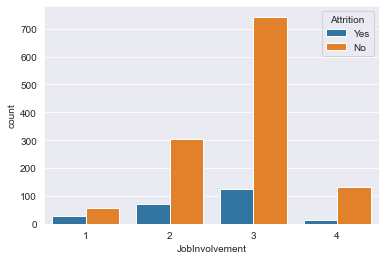

In [86]:
sns.countplot(data['JobInvolvement'],hue='Attrition',data=data)

In [88]:
#  More involvement, less change for attrition
##JobLevel

data['JobLevel'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

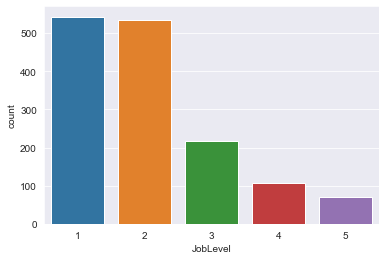

In [89]:
# ordinal categorical column

sns.countplot(data['JobLevel'])

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

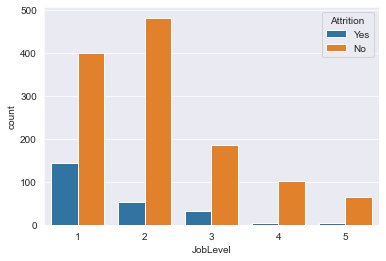

In [90]:
# Low level workiners are more.
sns.countplot(data['JobLevel'], hue='Attrition', data=data)

In [91]:
#JobRole

data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [92]:
data['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

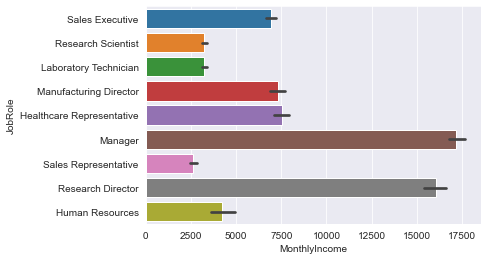

In [93]:
sns.barplot('MonthlyIncome','JobRole',data=data)

In [94]:
# Managers and Research Directors are taking more salary

In [95]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [96]:
##JobSatisfaction

data['JobSatisfaction'].unique()

array([4, 2, 3, 1], dtype=int64)

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

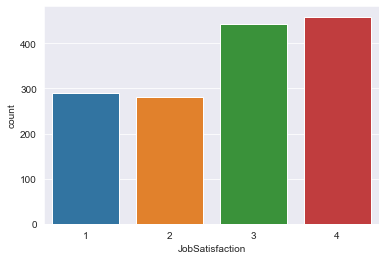

In [97]:
sns.countplot(data['JobSatisfaction'])

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

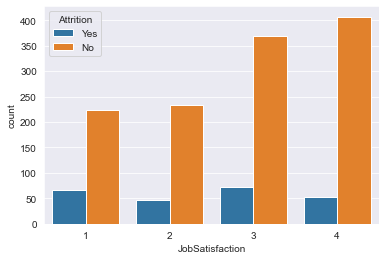

In [98]:
# More peroples are satisfied
sns.countplot(data['JobSatisfaction'],hue='Attrition', data=data)

In [99]:
##MaritalStatus

data['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

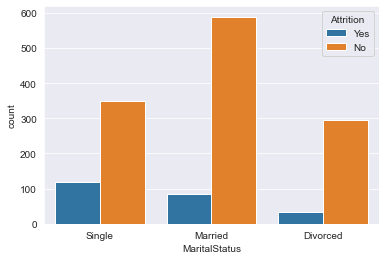

In [100]:
sns.countplot(data['MaritalStatus'], hue='Attrition',data=data)

In [101]:
# SIngle person do more attrition, divorce do less
##MonthlyIncome


data['MonthlyIncome'].unique()

array([5993, 5130, 2090, ..., 9991, 5390, 4404], dtype=int64)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

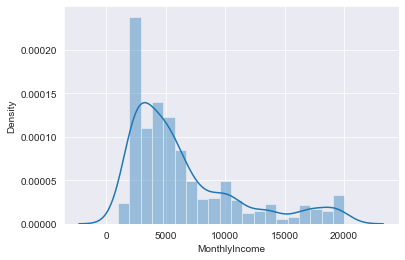

In [103]:
sns.distplot(data['MonthlyIncome'])

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

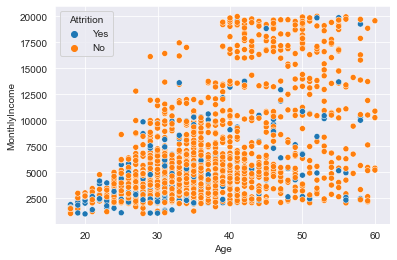

In [104]:
sns.scatterplot(x='Age', y='MonthlyIncome',hue='Attrition', data=data)

<AxesSubplot:xlabel='MonthlyRate', ylabel='Density'>

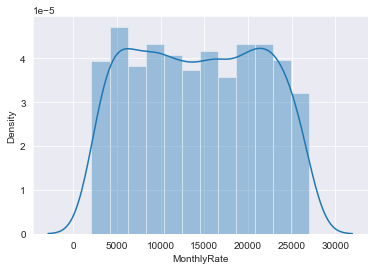

In [105]:
# Less Age and Less Salary do more Attrition
##MonthlyRate



sns.distplot(data['MonthlyRate'])

In [106]:
# Non uniform data

In [107]:
##NumCompaniesWorked


data['NumCompaniesWorked'].unique()

array([8, 1, 6, 9, 0, 4, 5, 2, 7, 3], dtype=int64)

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='MonthlyIncome'>

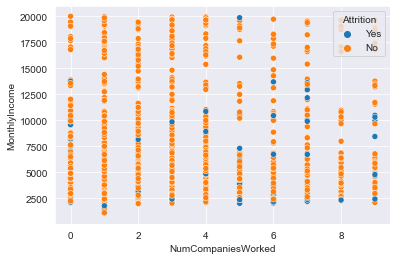

In [108]:
sns.scatterplot(x='NumCompaniesWorked',y='MonthlyIncome',hue='Attrition', data=data)

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Density'>

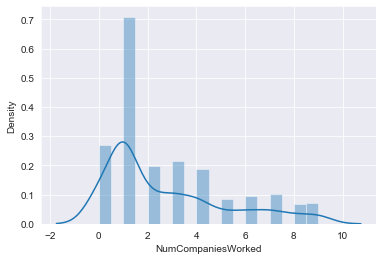

In [109]:
sns.distplot(data['NumCompaniesWorked'])

In [110]:
# Right Skewed data

In [115]:
##Over18


data['Over18'].unique()

array(['Y'], dtype=object)

In [116]:
# it has same info, not relevent for prediction, we can drop this

In [117]:
##OverTime



data['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [118]:
##PercentSalaryHike


data['PercentSalaryHike'].unique()

array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25],
      dtype=int64)

<AxesSubplot:xlabel='Attrition', ylabel='PercentSalaryHike'>

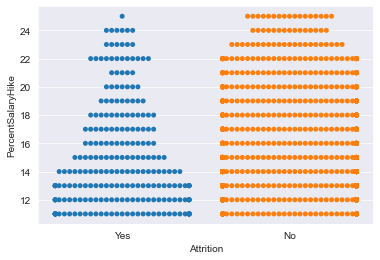

In [119]:
sns.swarmplot(data = data, x='Attrition', y='PercentSalaryHike')

In [120]:
# # As the percentage salary hike increases, job sttrition decreases

In [121]:
##  PerformanceRating


data['PerformanceRating'].unique()

array([3, 4], dtype=int64)

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

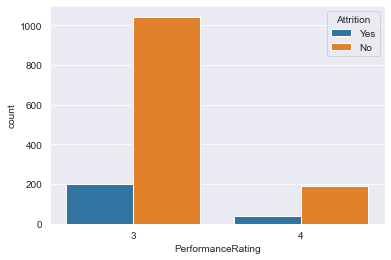

In [122]:
sns.countplot(data['PerformanceRating'],hue='Attrition', data=data)


In [123]:
# Low performace Rating peoples quits more to change job

In [124]:
## RelationshipSatisfaction


data['RelationshipSatisfaction'].unique()

array([1, 4, 2, 3], dtype=int64)

In [125]:
data.groupby('RelationshipSatisfaction')['Attrition'].value_counts()


RelationshipSatisfaction  Attrition
1                         No           219
                          Yes           57
2                         No           258
                          Yes           45
3                         No           388
                          Yes           71
4                         No           368
                          Yes           64
Name: Attrition, dtype: int64

In [126]:
data.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [127]:
##     StandardHours



data['StandardHours'].unique()

array([80], dtype=int64)

In [128]:
data['StandardHours'].nunique()

1

In [129]:
# This has 1 type of info only, we can drop this

In [130]:
###StockOptionLevel


data['StockOptionLevel'].unique()

array([0, 1, 3, 2], dtype=int64)

In [131]:
###TotalWorkingYears



data['TotalWorkingYears'].unique()

array([ 8, 10,  7,  6, 12,  1, 17,  5,  3, 31, 13,  0, 26, 24, 22,  9, 19,
        2, 23, 14, 15,  4, 29, 28, 21, 25, 20, 11, 16, 37, 38, 30, 40, 18,
       36, 34, 32, 33, 35, 27], dtype=int64)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='TotalWorkingYears'>

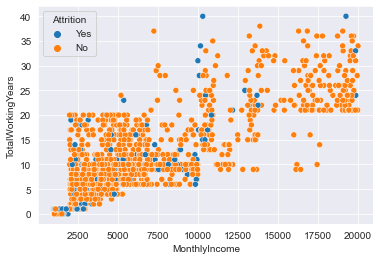

In [132]:
sns.scatterplot(x='MonthlyIncome',y='TotalWorkingYears', hue='Attrition', data=data)

In [133]:
# MOnthly income increases when totalworking years increases

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

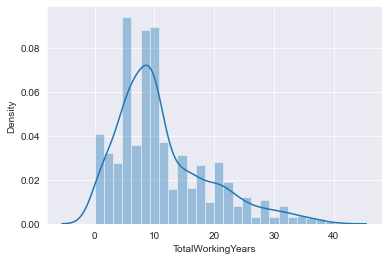

In [134]:
sns.distplot(data['TotalWorkingYears'])


In [135]:
##TrainingTimesLastYear



data['TrainingTimesLastYear'].unique()

array([0, 3, 2, 5, 1, 4, 6], dtype=int64)

In [136]:
## WorkLifeBalance

data['WorkLifeBalance'].unique()

array([1, 3, 2, 4], dtype=int64)

In [137]:
data.groupby('WorkLifeBalance')['Attrition'].value_counts()

WorkLifeBalance  Attrition
1                No            55
                 Yes           25
2                No           286
                 Yes           58
3                No           766
                 Yes          127
4                No           126
                 Yes           27
Name: Attrition, dtype: int64

In [138]:
##  YearsAtCompany



data['YearsAtCompany'].unique()

array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4, 25,  3, 12, 14, 22, 15, 27,
       21, 17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34,
       26, 30, 23], dtype=int64)

<AxesSubplot:xlabel='Age', ylabel='YearsAtCompany'>

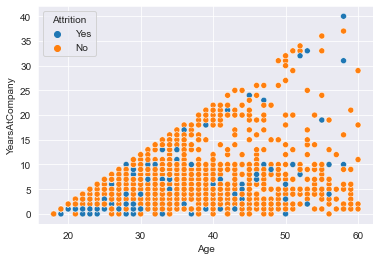

In [139]:
sns.scatterplot(x='Age',y='YearsAtCompany',hue='Attrition',data=data)

In [140]:
# As age increases, Yeasratcompany increases
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [141]:
data['Attrition'].nunique()

2

In [142]:
data['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [143]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [144]:
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [145]:
data.shape

(1470, 35)

In [146]:
a=data.drop('Attrition', axis=1)
b=data['Attrition']

In [147]:
a.shape , b.shape

((1470, 34), (1470,))

In [148]:
data=pd.concat([a,b], axis=1)

In [149]:
data.shape

(1470, 35)

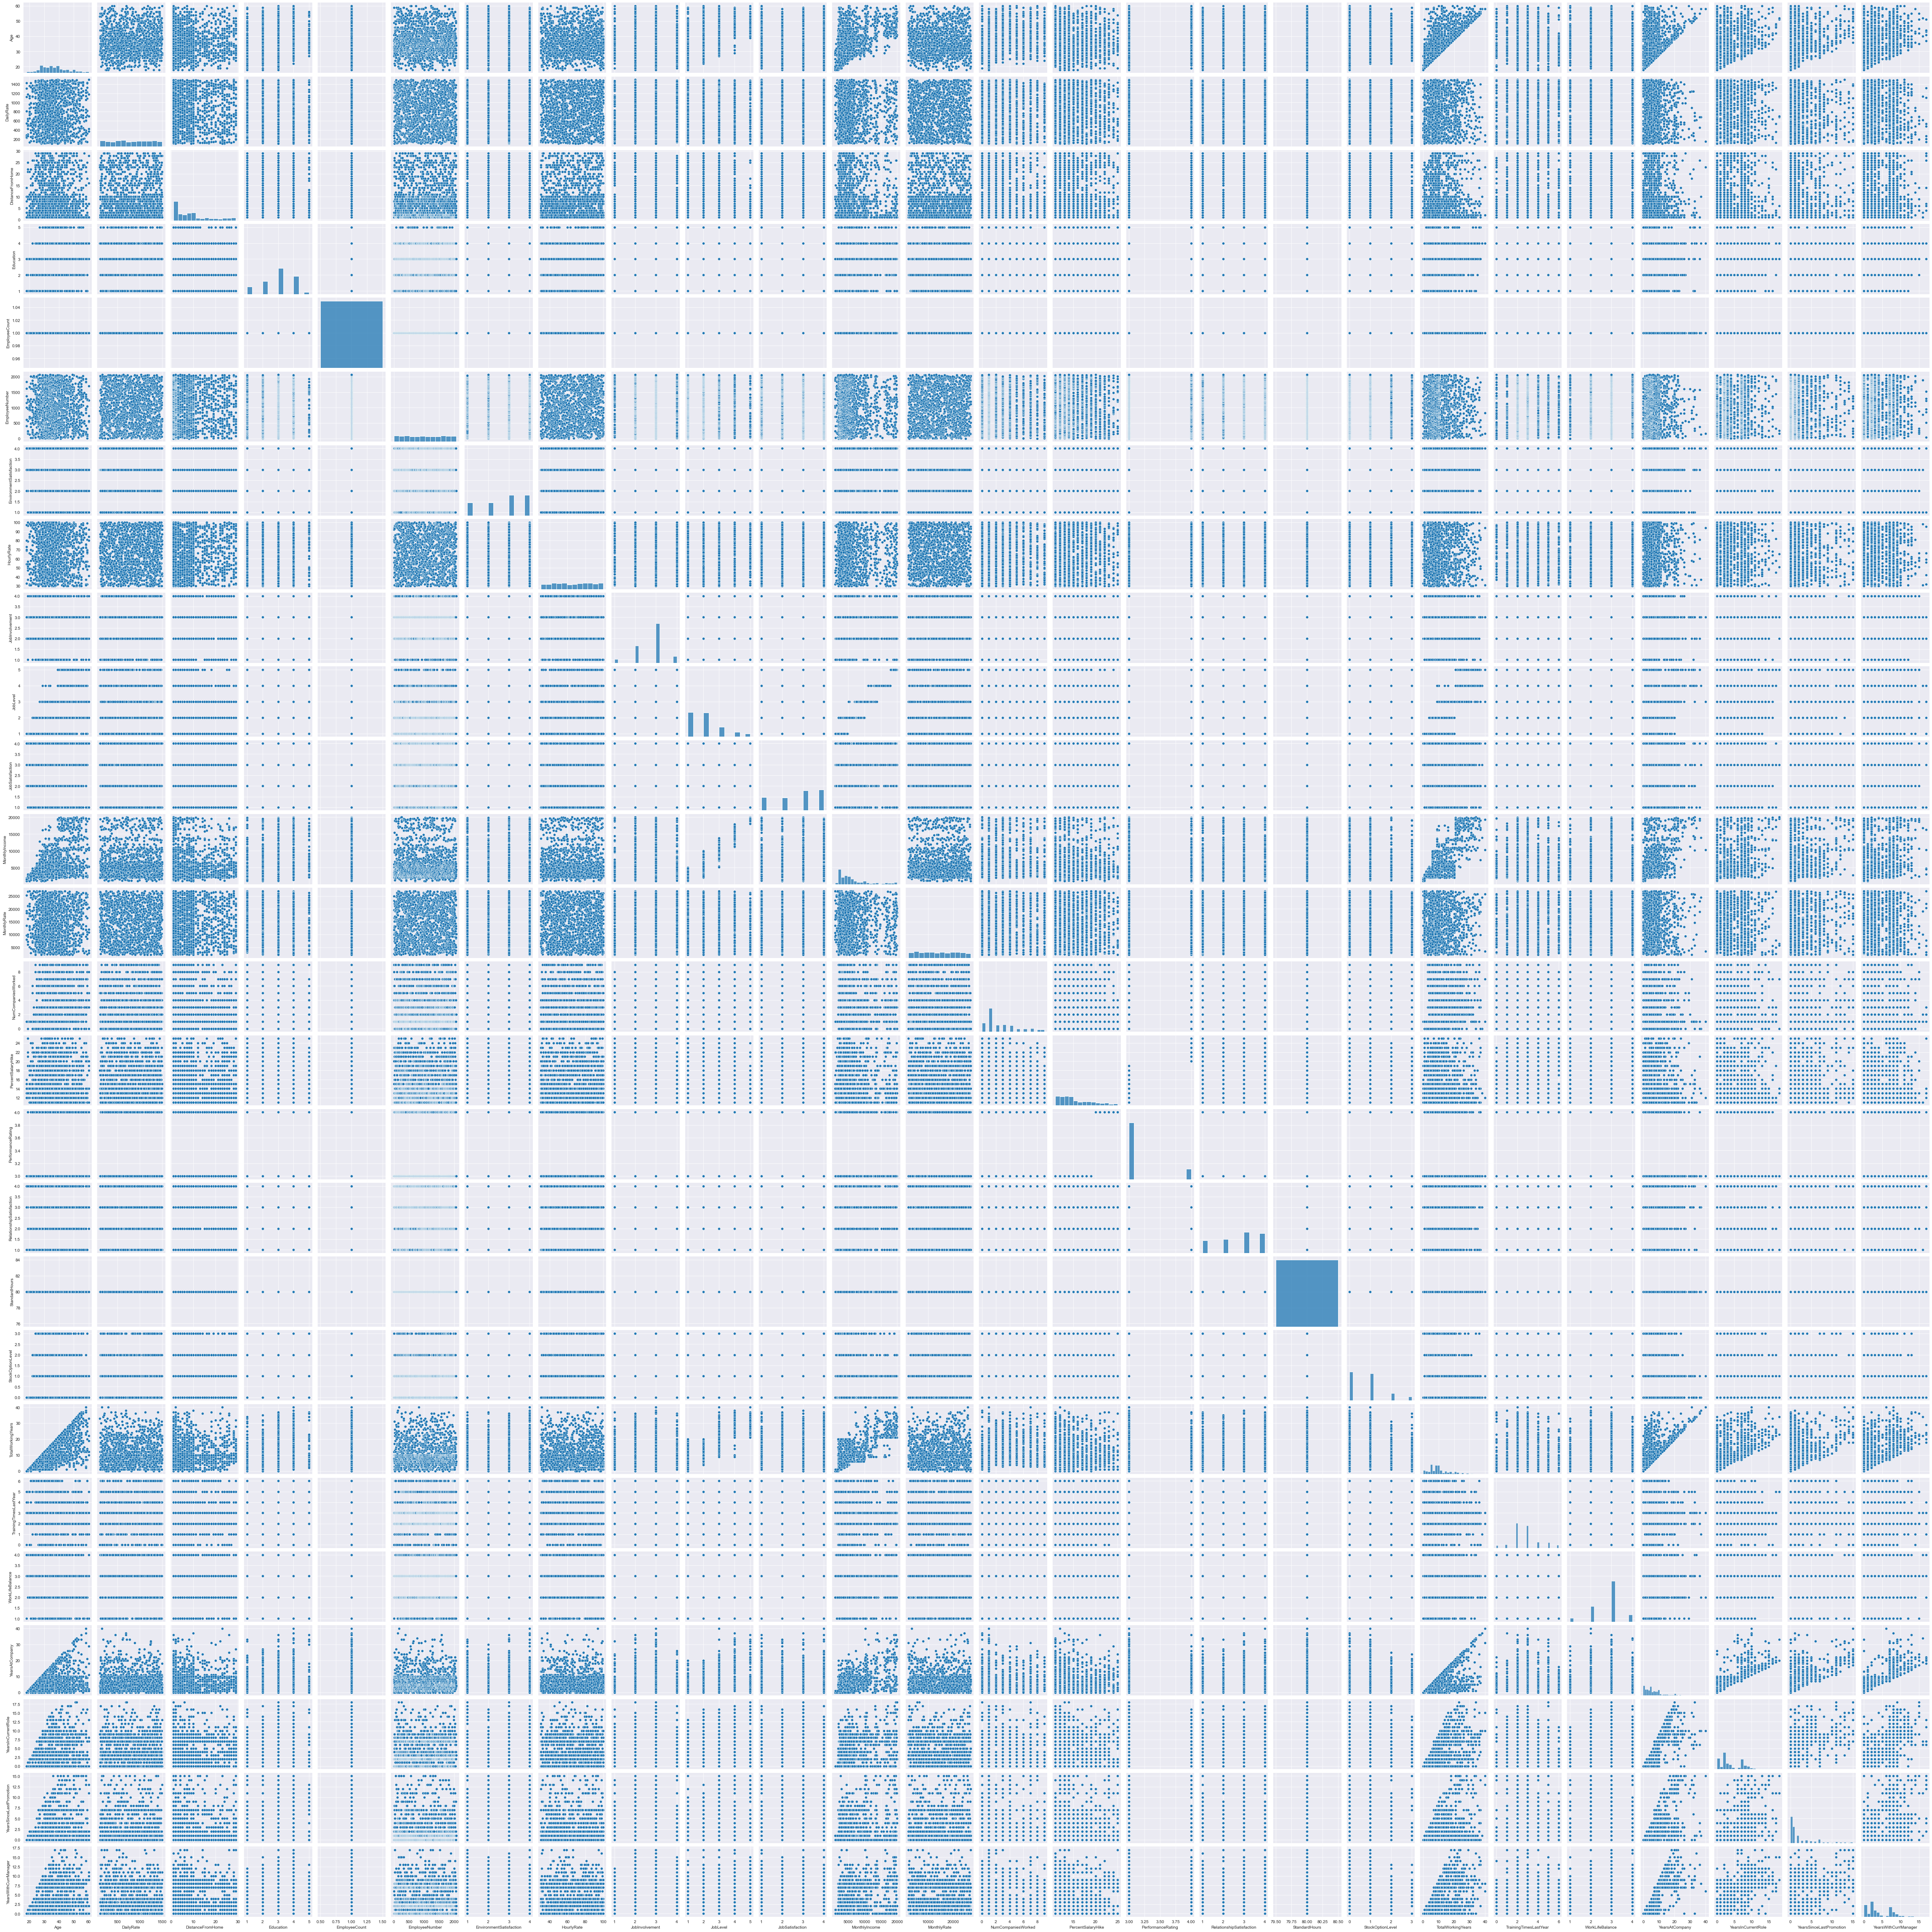

In [150]:
sns.pairplot(data)

<AxesSubplot:>

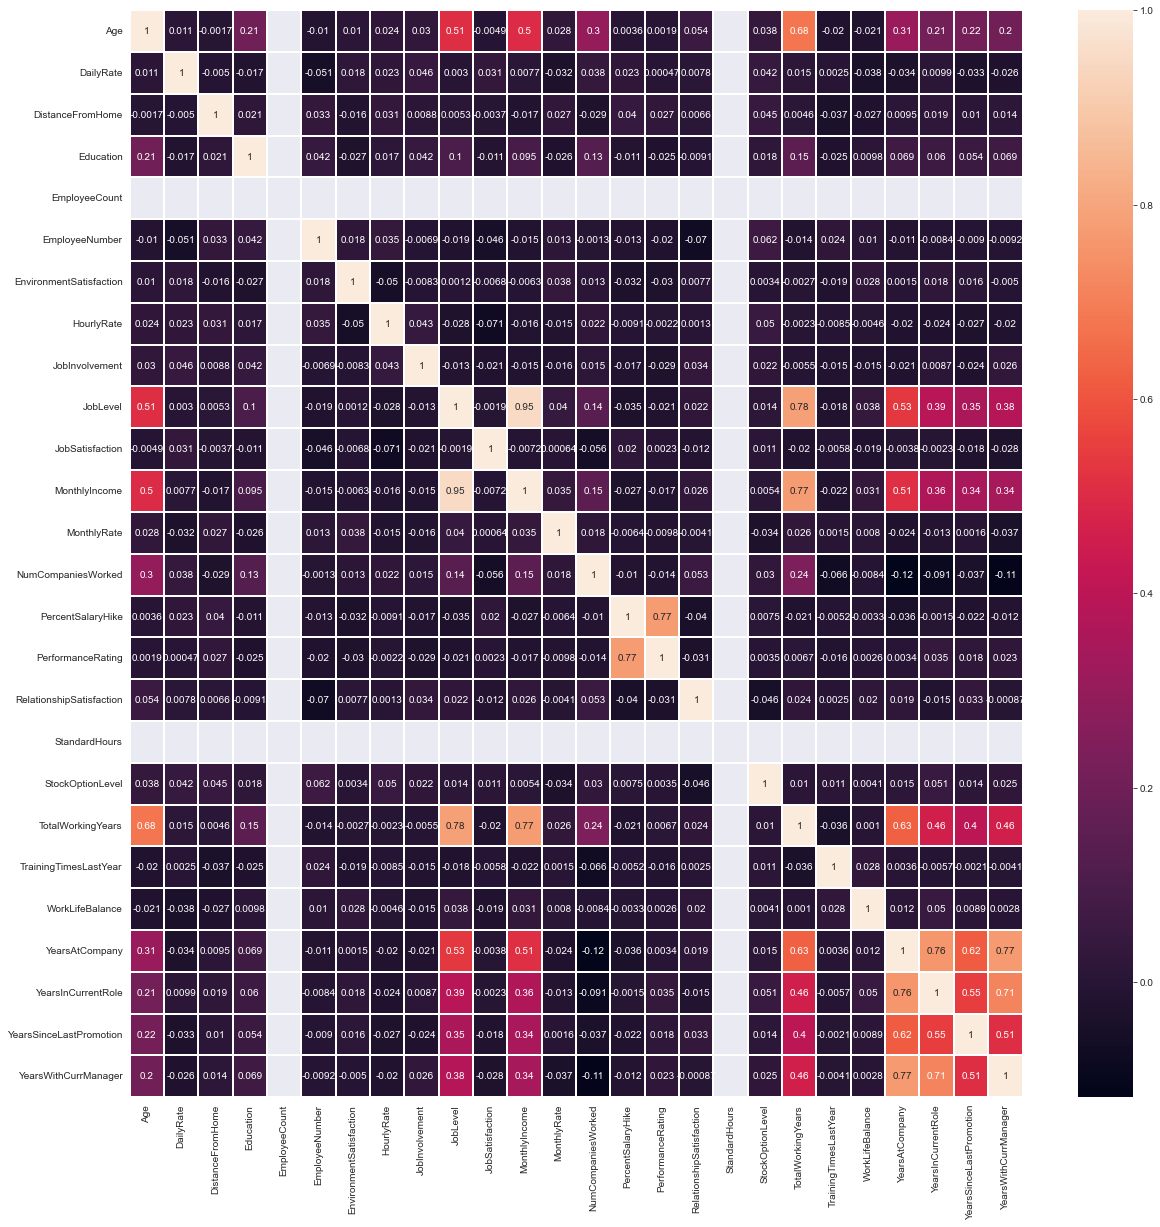

In [151]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True, linecolor='white',linewidths=.25)

In [152]:
# Most of the features are low correlated with target variable and soime strongly correlated

In [153]:
# Monthly income and Job Level are highly correlated
# Totalworkingyears are highly correlated with Joblevel
#Totalworkingyears are highly corre;ated with MOnthly income

# Yearsatcompany  and Years in current role are highly correlated

In [154]:
#    VIF


num=data.select_dtypes(np.number)

In [155]:
num.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [156]:
 from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
standard=sc.fit_transform(num)

In [157]:
standard=pd.DataFrame(standard, columns=num.columns)

In [158]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [159]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]

In [160]:
VIF

features        vif
0                        Age   2.044997
1                  DailyRate   1.020863
2           DistanceFromHome   1.016514
3                  Education   1.061247
4              EmployeeCount        NaN
5             EmployeeNumber   1.019558
6    EnvironmentSatisfaction   1.010565
7                 HourlyRate   1.019212
8             JobInvolvement   1.016367
9                   JobLevel  11.208731
10           JobSatisfaction   1.016416
11             MonthlyIncome  10.802169
12               MonthlyRate   1.012457
13        NumCompaniesWorked   1.257738
14         PercentSalaryHike   2.516413
15         PerformanceRating   2.514405
16  RelationshipSatisfaction   1.020376
17             StandardHours        NaN
18          StockOptionLevel   1.021305
19         TotalWorkingYears   4.767805
20     TrainingTimesLastYear   1.010545
21           WorkLifeBalance   1.014959
22            YearsAtCompany   4.587405
23        YearsInCurrentRole   2.718616
24   YearsSinceLastPromotion   1.674285
25      YearsWithCurrManager   2.774625

In [161]:
# Multicolinearity is in controll now.
# Remove features from the dataset

In [162]:
# Remove features from the dataset

data.drop(['EmployeeCount','EmployeeNumber','StandardHours','JobLevel','Over18'], axis=1, inplace=True)

In [163]:
standard.drop(['EmployeeCount','EmployeeNumber','StandardHours','JobLevel'], axis=1, inplace=True)

In [164]:
data.shape

(1470, 30)

<AxesSubplot:>

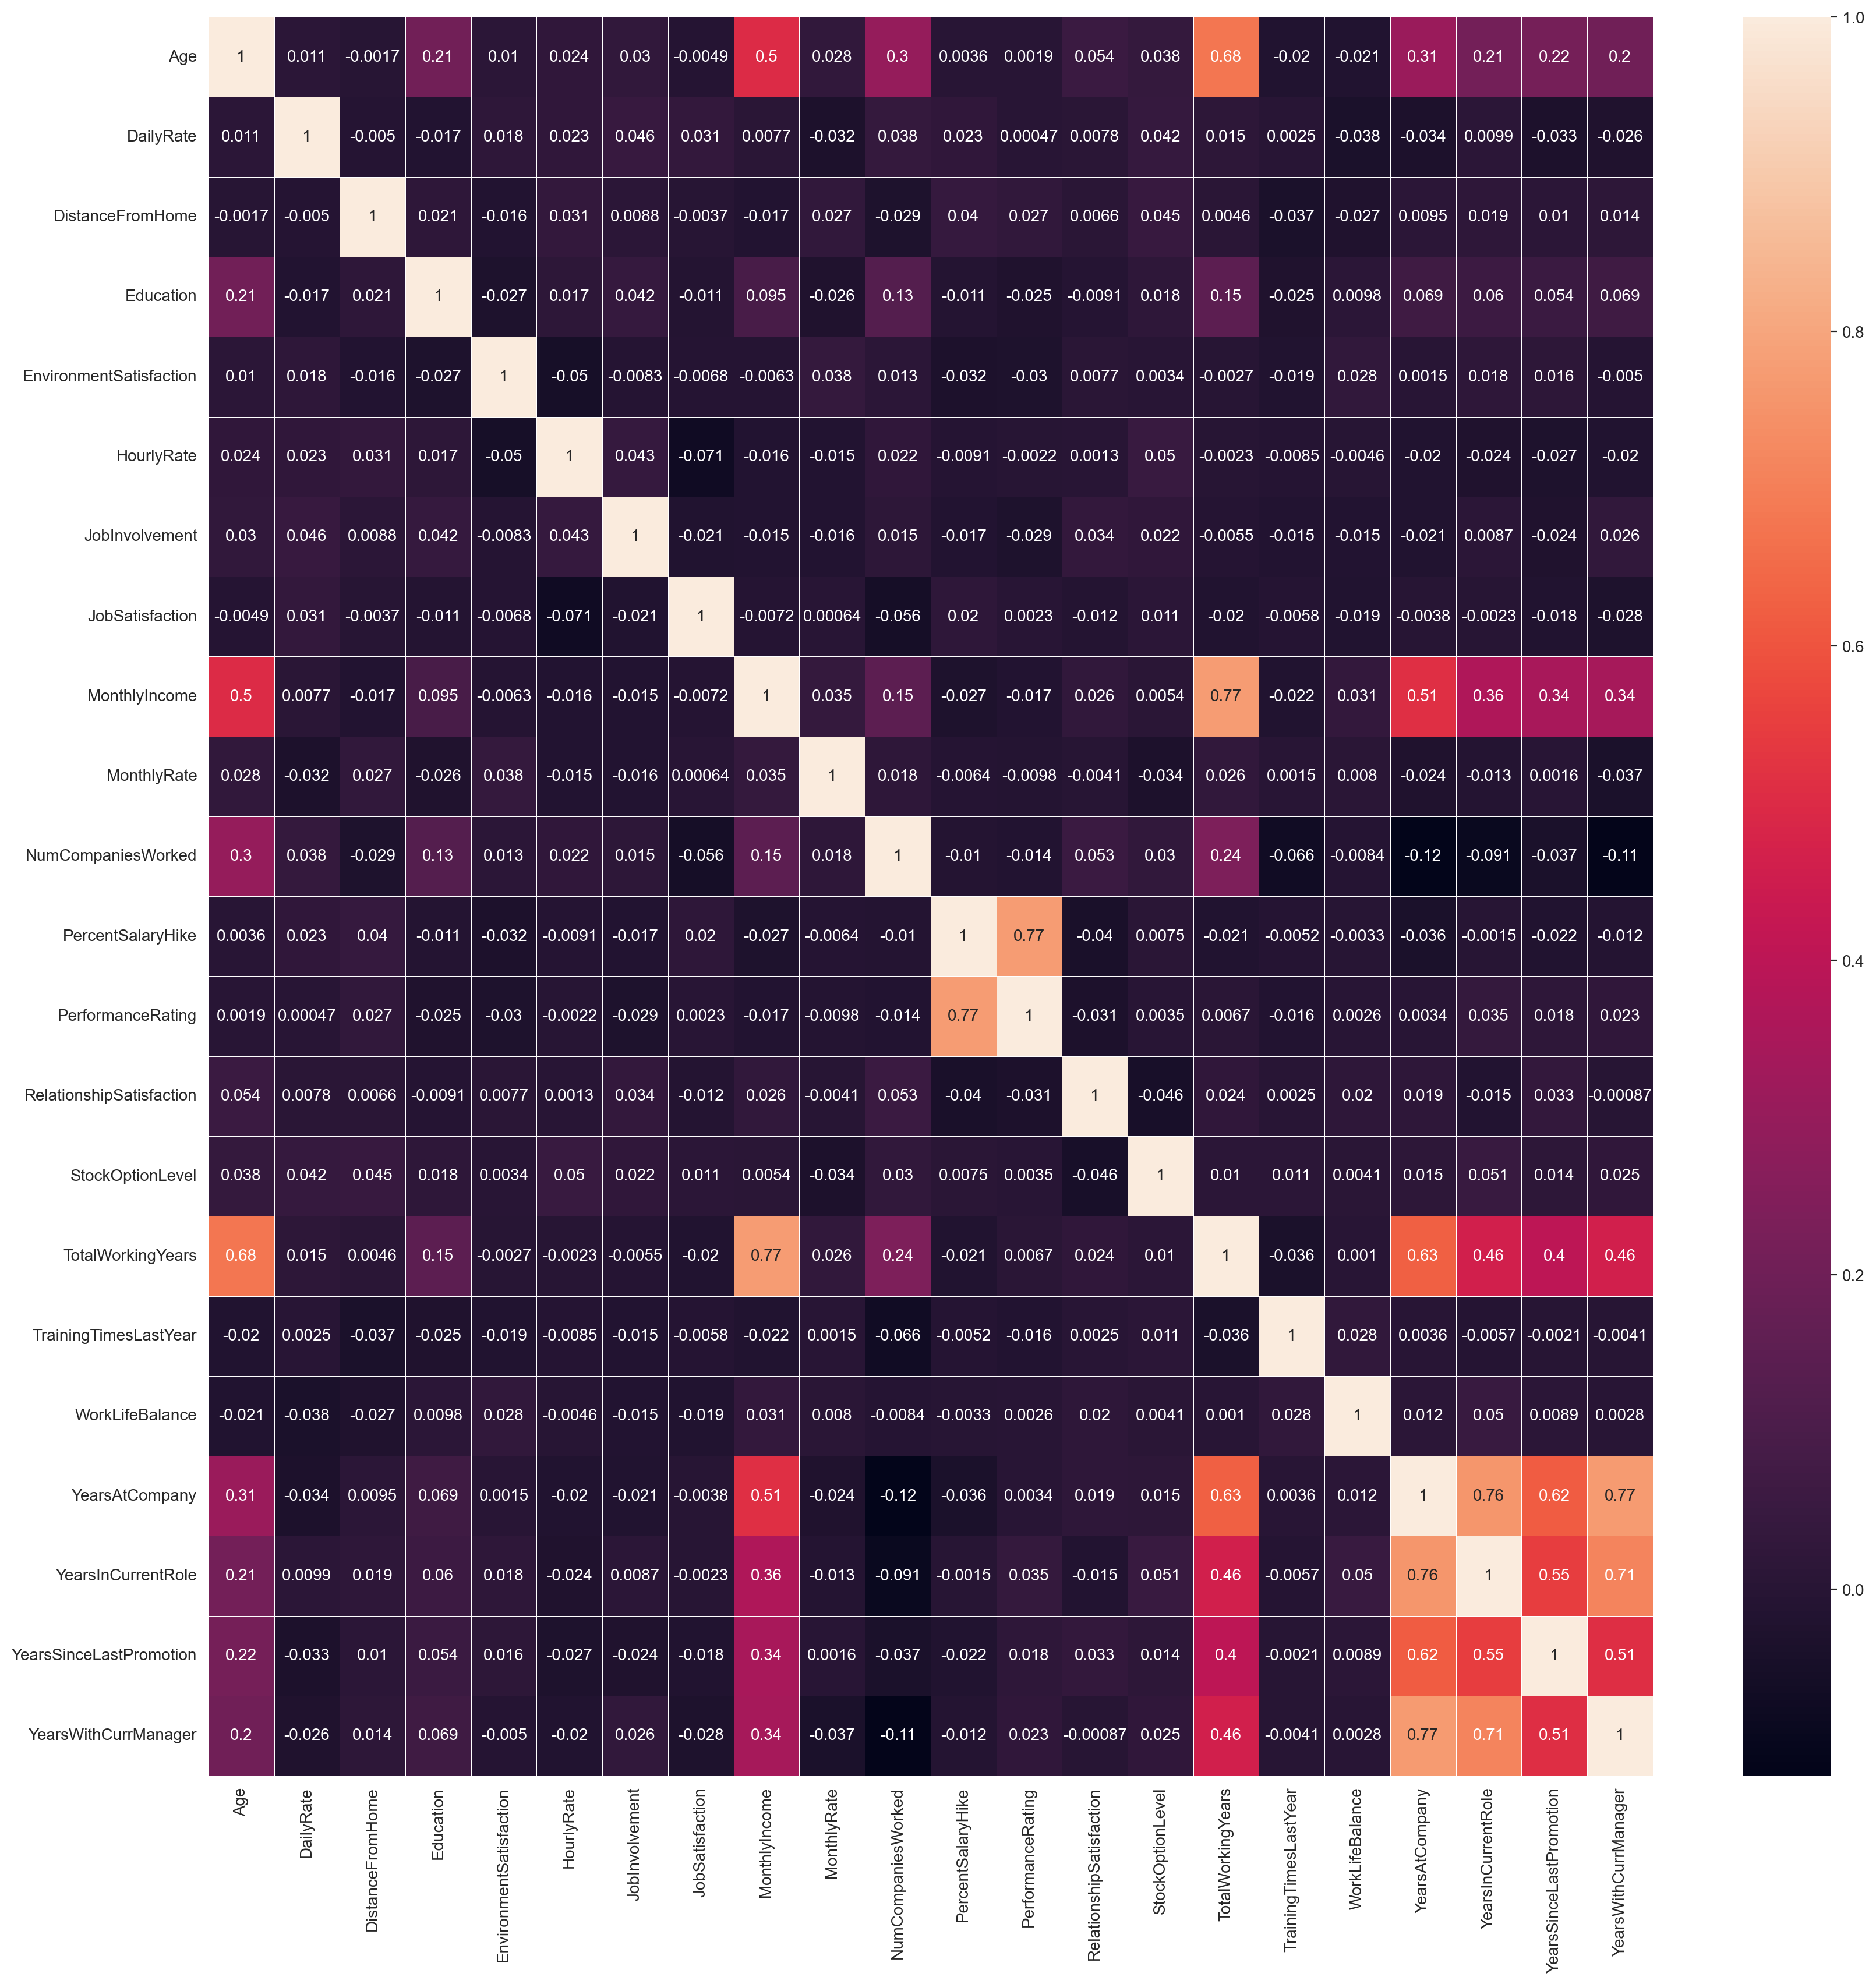

In [165]:
# 5 features have been removed
# Again correlation
plt.figure(figsize=(20,20),dpi=200)
sns.heatmap(data.corr(),annot=True, linecolor='white',linewidths=.25)

In [174]:
data.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

Age                            AxesSubplot(0.125,0.749828;0.133621x0.130172)
DailyRate                   AxesSubplot(0.285345,0.749828;0.133621x0.130172)
DistanceFromHome             AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Education                   AxesSubplot(0.606034,0.749828;0.133621x0.130172)
EnvironmentSatisfaction     AxesSubplot(0.766379,0.749828;0.133621x0.130172)
HourlyRate                     AxesSubplot(0.125,0.593621;0.133621x0.130172)
JobInvolvement              AxesSubplot(0.285345,0.593621;0.133621x0.130172)
JobSatisfaction              AxesSubplot(0.44569,0.593621;0.133621x0.130172)
MonthlyIncome               AxesSubplot(0.606034,0.593621;0.133621x0.130172)
MonthlyRate                 AxesSubplot(0.766379,0.593621;0.133621x0.130172)
NumCompaniesWorked             AxesSubplot(0.125,0.437414;0.133621x0.130172)
PercentSalaryHike           AxesSubplot(0.285345,0.437414;0.133621x0.130172)
PerformanceRating            AxesSubplot(0.44569,0.437414;0.133621x0.130172)

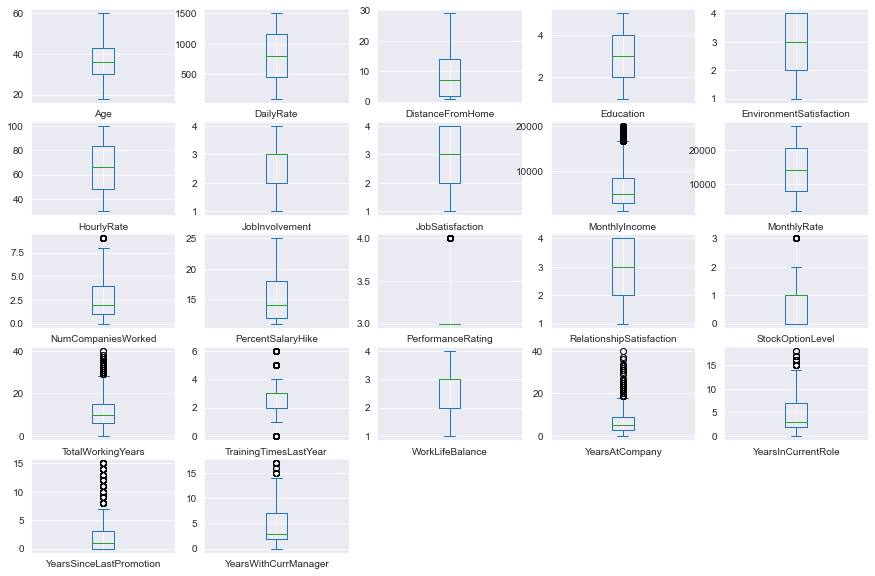

In [175]:
## Outliers

num= data.select_dtypes(np.number)


data.plot(kind='box', subplots=True, layout=(5,5),figsize=(15,10))

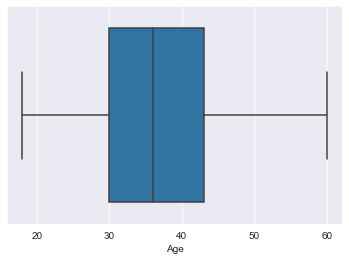

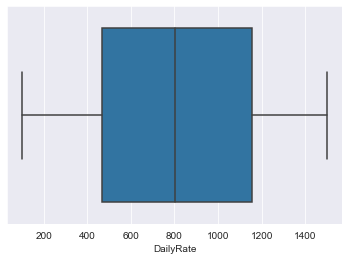

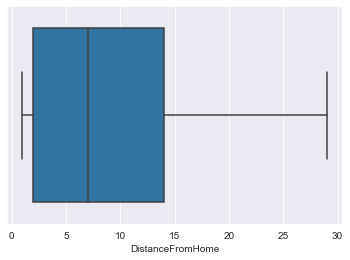

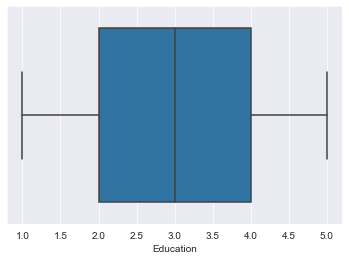

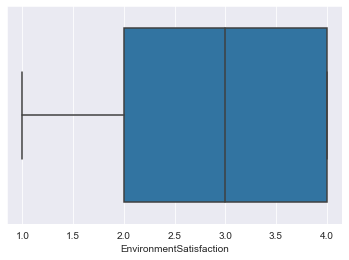

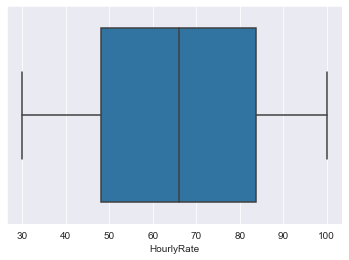

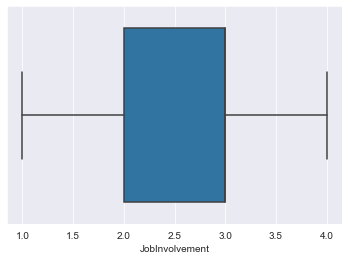

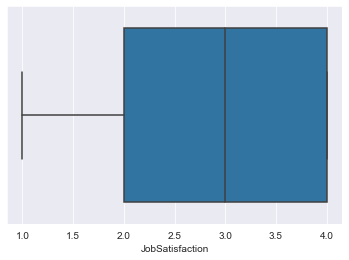

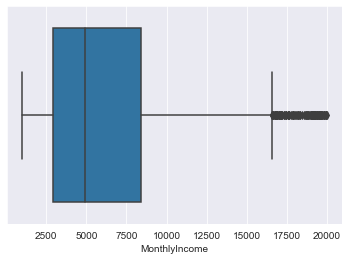

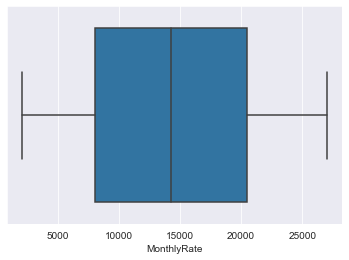

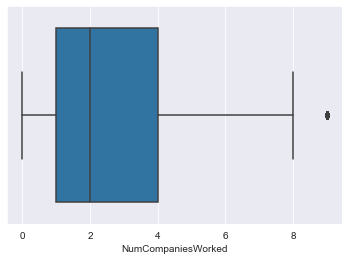

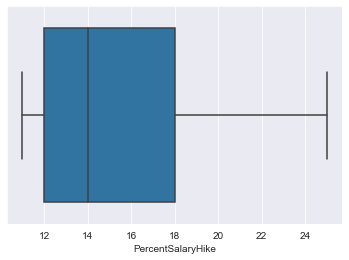

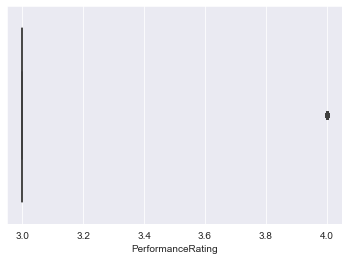

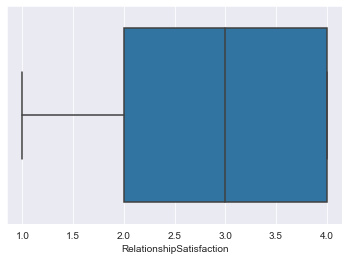

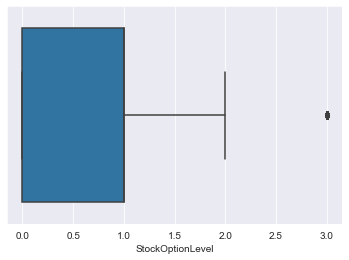

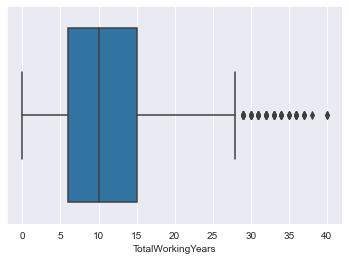

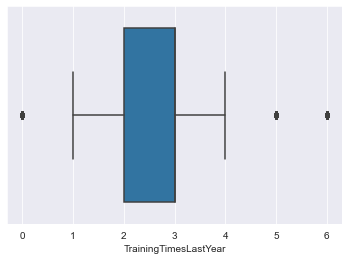

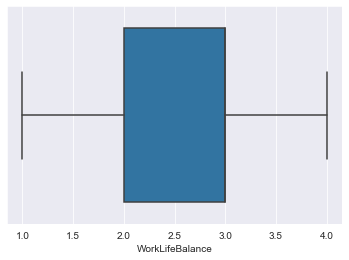

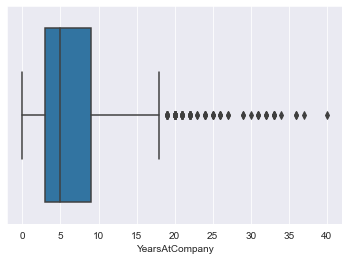

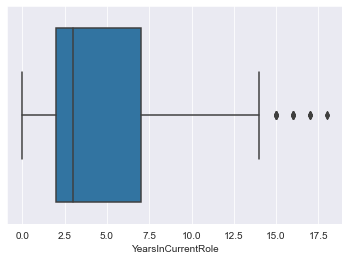

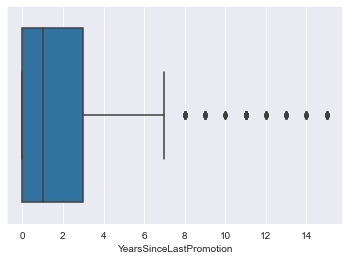

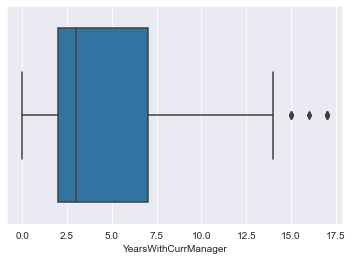

In [176]:
for i in num:
    sns.boxplot(data[i])
    plt.show()

In [177]:
# seems some features have outliers, letas check if they are actually outliers or not

In [178]:
data['MonthlyIncome'].unique()

array([5993, 5130, 2090, ..., 9991, 5390, 4404], dtype=int64)

In [179]:
data['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [180]:
# Few high posts have rarely high income. It could be true

In [181]:
data['NumCompaniesWorked'].describe()

count    1470.000000
mean        2.693197
std         2.498009
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

In [182]:
data[data['NumCompaniesWorked']==9]

Age     BusinessTravel  DailyRate              Department  \
4      27      Travel_Rarely        591  Research & Development   
38     36      Travel_Rarely        852  Research & Development   
50     48      Travel_Rarely        626  Research & Development   
95     54      Travel_Rarely       1217  Research & Development   
105    59         Non-Travel       1420         Human Resources   
122    56      Travel_Rarely        441  Research & Development   
194    45         Non-Travel       1195  Research & Development   
198    38      Travel_Rarely       1261  Research & Development   
208    40         Non-Travel       1151  Research & Development   
245    31  Travel_Frequently       1327  Research & Development   
287    38      Travel_Rarely        688  Research & Development   
290    49  Travel_Frequently        636  Research & Development   
334    45      Travel_Rarely        549  Research & Development   
371    29      Travel_Rarely       1283  Research & Development   
372    35      Travel_Rarely        755  Research & Development   
385    30  Travel_Frequently        464  Research & Development   
393    34         Non-Travel       1381                   Sales   
401    56  Travel_Frequently        906                   Sales   
440    34  Travel_Frequently        988         Human Resources   
447    35      Travel_Rarely        619                   Sales   
456    31      Travel_Rarely        688                   Sales   
525    24      Travel_Rarely        693                   Sales   
541    36         Non-Travel        427  Research & Development   
544    47  Travel_Frequently        217                   Sales   
551    39      Travel_Rarely        141         Human Resources   
575    54      Travel_Rarely        376  Research & Development   
597    42      Travel_Rarely        932  Research & Development   
617    44      Travel_Rarely        625  Research & Development   
623    30  Travel_Frequently       1012  Research & Development   
660    58  Travel_Frequently        781  Research & Development   
714    50      Travel_Rarely       1126  Research & Development   
717    27      Travel_Rarely       1134  Research & Development   
756    32         Non-Travel       1109  Research & Development   
770    46      Travel_Rarely        430  Research & Development   
779    51      Travel_Rarely       1323  Research & Development   
789    44      Travel_Rarely       1376         Human Resources   
816    39         Non-Travel        439  Research & Development   
837    40  Travel_Frequently        593  Research & Development   
927    36      Travel_Rarely        429  Research & Development   
947    52      Travel_Rarely       1030                   Sales   
957    40         Non-Travel        458  Research & Development   
1000   52      Travel_Rarely        258  Research & Development   
1035   31      Travel_Rarely       1398         Human Resources   
1117   34      Travel_Rarely       1351  Research & Development   
1145   36      Travel_Rarely        559  Research & Development   
1162   35      Travel_Rarely        737                   Sales   
1172   29      Travel_Rarely        469                   Sales   
1219   29      Travel_Rarely       1082  Research & Development   
1262   43  Travel_Frequently        807  Research & Development   
1296   30      Travel_Rarely       1092  Research & Development   
1357   42      Travel_Rarely       1396  Research & Development   
1442   29      Travel_Rarely       1092  Research & Development   

      DistanceFromHome  Education    EducationField  EnvironmentSatisfaction  \
4                    2          1           Medical                        1   
38                   5          4     Life Sciences                        2   
50                   1          2     Life Sciences                        1   
95                   2          4  Technical Degree                        1   
105                  2          4   Human Resources   

In [183]:
# If a person starte working at 18, possibly at low jobe profile he can change job every year.

In [184]:
data['PercentSalaryHike'].unique()

array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25],
      dtype=int64)

In [185]:
data['PercentSalaryHike'].describe()

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

In [186]:
# 25% salary hike is resonable for few emoployees, definatley not an outlier

In [187]:
data['PerformanceRating'].unique()

array([3, 4], dtype=int64)

In [188]:
# definately not an outlier

data['StockOptionLevel'].unique()

array([0, 1, 3, 2], dtype=int64)

In [189]:
# Not an outlier

In [190]:
data['TotalWorkingYears'].unique()

array([ 8, 10,  7,  6, 12,  1, 17,  5,  3, 31, 13,  0, 26, 24, 22,  9, 19,
        2, 23, 14, 15,  4, 29, 28, 21, 25, 20, 11, 16, 37, 38, 30, 40, 18,
       36, 34, 32, 33, 35, 27], dtype=int64)

In [191]:
data['TotalWorkingYears'].describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

In [192]:
data['TotalWorkingYears'].max()

40

In [193]:
data[df['TotalWorkingYears']==40]

Age BusinessTravel  DailyRate              Department  DistanceFromHome  \
126   58  Travel_Rarely        147  Research & Development                23   
595   58  Travel_Rarely        286  Research & Development                 2   

     Education EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
126          4        Medical                        4  Female          94   
595          4  Life Sciences                        4    Male          31   

     ...  RelationshipSatisfaction StockOptionLevel  TotalWorkingYears  \
126  ...                         4                1                 40   
595  ...                         4                0                 40   

    TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
126                     3                2              40   
595                     2                3              31   

     YearsInCurrentRole YearsSinceLastPromotion  YearsWithCurrManager  \
126                  10                      15                     6   
595                  15                      13                     8   

     Attrition  
126        Yes  
595        Yes  

[2 rows x 30 columns]

In [194]:
# yes it be person start working at 18 till 58 which completes 18 years

In [195]:
data['TrainingTimesLastYear'].unique()

array([0, 3, 2, 5, 1, 4, 6], dtype=int64)

In [196]:
data['TrainingTimesLastYear'].describe()

count    1470.000000
mean        2.799320
std         1.289271
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64

In [197]:
# Not an outlier

In [198]:
data['YearsAtCompany'].unique()

array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4, 25,  3, 12, 14, 22, 15, 27,
       21, 17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34,
       26, 30, 23], dtype=int64)

In [199]:
data['YearsAtCompany'].max()

40

In [200]:
data[df['YearsAtCompany']==40]

Age BusinessTravel  DailyRate              Department  DistanceFromHome  \
126   58  Travel_Rarely        147  Research & Development                23   

     Education EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
126          4        Medical                        4  Female          94   

     ...  RelationshipSatisfaction StockOptionLevel  TotalWorkingYears  \
126  ...                         4                1                 40   

    TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
126                     3                2              40   

     YearsInCurrentRole YearsSinceLastPromotion  YearsWithCurrManager  \
126                  10                      15                     6   

     Attrition  
126        Yes  

[1 rows x 30 columns]

In [201]:
# Not an outlier

In [202]:
data['YearsInCurrentRole'].unique()

array([ 4,  7,  0,  2,  5,  9,  8,  3,  6, 13,  1, 15, 14, 16, 11, 10, 12,
       18, 17], dtype=int64)

In [203]:
data['YearsInCurrentRole'].describe()

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Density'>

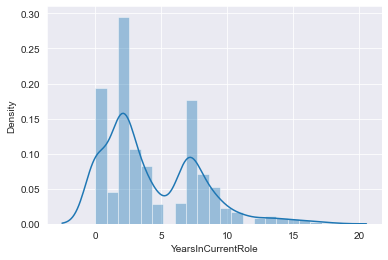

In [204]:
sns.distplot(data['YearsInCurrentRole'])

In [205]:
# This is not an outlier, very few peoples have 20 ye experience in current role

In [206]:
data['YearsSinceLastPromotion'].unique()

array([ 0,  1,  3,  2,  7,  4,  8,  6,  5, 15,  9, 13, 12, 10, 11, 14],
      dtype=int64)

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

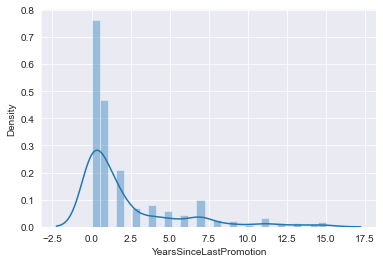

In [207]:
sns.distplot(data['YearsSinceLastPromotion'])

In [208]:
# Categorical feature and definetly not an outlier

In [209]:
data['YearsWithCurrManager'].unique()

array([ 5,  7,  0,  2,  6,  8,  3, 11, 17,  1,  4, 12,  9, 10, 15, 13, 16,
       14], dtype=int64)

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

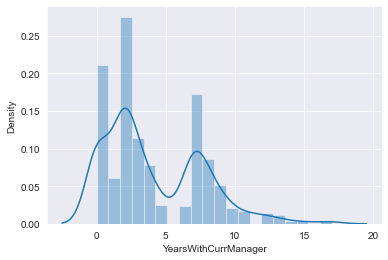

In [210]:
sns.distplot(data['YearsWithCurrManager'])

In [211]:
data[data['YearsWithCurrManager']==16]

Age BusinessTravel  DailyRate              Department  DistanceFromHome  \
561    52  Travel_Rarely        621                   Sales                 3   
1348   40  Travel_Rarely       1137  Research & Development                 1   

      Education EducationField  EnvironmentSatisfaction Gender  HourlyRate  \
561           4      Marketing                        3   Male          31   
1348          4  Life Sciences                        1   Male          98   

      ...  RelationshipSatisfaction StockOptionLevel  TotalWorkingYears  \
561   ...                         1                0                 34   
1348  ...                         1                1                 22   

     TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
561                      3                4              34   
1348                     3                3              19   

      YearsInCurrentRole YearsSinceLastPromotion  YearsWithCurrManager  \
561                    6                       1                    16   
1348                   7                      11                    16   

      Attrition  
561          No  
1348         No  

[2 rows x 30 columns]

In [212]:
data.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition'],
      dtype='object')

In [213]:
# We dnt see any much outliers in the dataset

In [214]:
#####    Handle categorical features



data.select_dtypes('O')

BusinessTravel              Department EducationField  Gender  \
0         Travel_Rarely                   Sales  Life Sciences  Female   
1     Travel_Frequently  Research & Development  Life Sciences    Male   
2         Travel_Rarely  Research & Development          Other    Male   
3     Travel_Frequently  Research & Development  Life Sciences  Female   
4         Travel_Rarely  Research & Development        Medical    Male   
...                 ...                     ...            ...     ...   
1465  Travel_Frequently  Research & Development        Medical    Male   
1466      Travel_Rarely  Research & Development        Medical    Male   
1467      Travel_Rarely  Research & Development  Life Sciences    Male   
1468  Travel_Frequently                   Sales        Medical    Male   
1469      Travel_Rarely  Research & Development        Medical    Male   

                        JobRole MaritalStatus OverTime Attrition  
0               Sales Executive        Single      Yes       Yes  
1            Research Scientist       Married       No        No  
2         Laboratory Technician        Single      Yes       Yes  
3            Research Scientist       Married      Yes        No  
4         Laboratory Technician       Married       No        No  
...                         ...           ...      ...       ...  
1465      Laboratory Technician       Married       No        No  
1466  Healthcare Representative       Married       No        No  
1467     Manufacturing Director       Married      Yes        No  
1468            Sales Executive       Married       No        No  
1469      Laboratory Technician       Married       No        No  

[1470 rows x 8 columns]

In [215]:
data.shape

(1470, 30)

In [216]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [217]:
data.head()

Age     BusinessTravel  DailyRate              Department  \
0   41      Travel_Rarely       1102                   Sales   
1   49  Travel_Frequently        279  Research & Development   
2   37      Travel_Rarely       1373  Research & Development   
3   33  Travel_Frequently       1392  Research & Development   
4   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  ...  RelationshipSatisfaction StockOptionLevel  \
0  Female          94  ...                         1                0   
1    Male          61  ...                         4                1   
2    Male          92  ...                         2                0   
3  Female          56  ...                         3                0   
4    Male          40  ...                         4                1   

   TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                     0                1               6   
1                 10                     3                3              10   
2                  7                     3                3               0   
3                  8                     3                3               8   
4                  6                     3                3               2   

   YearsInCurrentRole YearsSinceLastPromotion  YearsWithCurrManager  Attrition  
0                   4                       0                     5        Yes  
1                   7                       1                     7         No  
2                   0                       0                     0        Yes  
3                   7                       3                     0         No  
4                   2                       2                     2         No  

[5 rows x 30 columns]

In [218]:
X= data.drop('Attrition', axis=1)
Y=data['Attrition']

In [219]:
X.shape , Y.shape

((1470, 29), (1470,))

In [220]:
####   Balancing Data



X=pd.get_dummies(X,drop_first=True)

In [221]:
X.shape

(1470, 43)

In [222]:
X

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0      41       1102                 1          2                        2   
1      49        279                 8          1                        3   
2      37       1373                 2          2                        4   
3      33       1392                 3          4                        4   
4      27        591                 2          1                        1   
...   ...        ...               ...        ...                      ...   
1465   36        884                23          2                        3   
1466   39        613                 6          1                        4   
1467   27        155                 4          3                        2   
1468   49       1023                 2          3                        4   
1469   34        628                 8          3                        2   

      HourlyRate  JobInvolvement  JobSatisfaction  MonthlyIncome  MonthlyRate  \
0             94               3                4           5993        19479   
1             61               2                2           5130        24907   
2             92               2                3           2090         2396   
3             56               3                3           2909        23159   
4             40               3                2           3468        16632   
...          ...             ...              ...            ...          ...   
1465          41               4                4           2571        12290   
1466          42               2                1           9991        21457   
1467          87               4                2           6142         5174   
1468          63               2                2           5390        13243   
1469          82               4                3           4404        10228   

      ...  JobRole_Laboratory Technician  JobRole_Manager  \
0     ...                              0                0   
1     ...                              0                0   
2     ...                              1                0   
3     ...                              0                0   
4     ...                              1                0   
...   ...                            ...              ...   
1465  ...                              1                0   
1466  ...                              0                0   
1467  ...                              0                0   
1468  ...                              0                0   
1469  ...                              1                0   

      JobRole_Manufacturing Director  JobRole_Research Director  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   
...                              ...                        ...   
1465                               0                          0   
1466                               0                          0   
1467                               1                          0   
1468                               0                          0   
1469                               0                          0   

      JobRole_Research Scientist  JobRole_Sales Executive  \
0                              0                        1   
1                              1                        0   
2                              0                        0   
3                              1                        0   
4                              0                        0   
...                          ...                      ...   
1465                           0                        0   
1466                           0                        0   
1467     

In [223]:
X.skew()

Age                                  0.413286
DailyRate                           -0.003519
DistanceFromHome                     0.958118
Education                           -0.289681
EnvironmentSatisfaction             -0.321654
HourlyRate                          -0.032311
JobInvolvement                      -0.498419
JobSatisfaction                     -0.329672
MonthlyIncome                        1.369817
MonthlyRate                          0.018578
NumCompaniesWorked                   1.026471
PercentSalaryHike                    0.821128
PerformanceRating                    1.921883
RelationshipSatisfaction            -0.302828
StockOptionLevel                     0.968980
TotalWorkingYears                    1.117172
TrainingTimesLastYear                0.553124
WorkLifeBalance                     -0.552480
YearsAtCompany                       1.764529
YearsInCurrentRole                   0.917363
YearsSinceLastPromotion              1.984290
YearsWithCurrManager              

In [224]:
###    Transformation



from sklearn.preprocessing import power_transform
transformed=power_transform(X)

In [225]:
pd.DataFrame(transformed).skew()

0    -0.007603
1    -0.196160
2    -0.007468
3    -0.099881
4    -0.205395
5    -0.106461
6    -0.020365
7    -0.212815
8     0.000000
9    -0.184087
10    0.014814
11    0.116250
12    0.000000
13   -0.193634
14    0.087019
15   -0.010653
16    0.058058
17   -0.012286
18   -0.008683
19   -0.060849
20    0.212129
21   -0.067565
22    1.595067
23   -0.923992
24   -0.646936
25    0.856158
26    0.356919
27    2.525783
28    0.794118
29    3.875119
30    2.872604
31   -0.408665
32    5.035637
33    1.701604
34    3.392611
35    2.694844
36    3.932443
37    1.512214
38    1.340834
39    3.847192
40    0.169484
41    0.773874
42    0.964489
dtype: float64

In [226]:
##   Standardization



from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [227]:
scaled=sc.fit_transform(transformed)

In [228]:
X= scaled

In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [239]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()


In [240]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

from sklearn.model_selection import cross_val_score

In [241]:
###  Hypertuning of RandomForest

n_estimator= [200, 400, 600, 800, 1000]  # no of tree in Random forest, default is 100
max_features= ['auto','sqrt','log2']  # mini no of features to create Decission Tree
max_depth=[10, 64, 118, 173, 227, 282, 336]  #  Max depth of decision tree
min_samples_split= [1,2,3]   # mini no of sample rerquired to split node
min_samples_leaf= [1,3,4,6,7,9]  #mini no of sample required at each leaf node

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 400, 600, 800, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 64, 118, 173, 227, 282, 336],
 'min_samples_split': [1, 2, 3],
 'min_samples_leaf': [1, 3, 4, 6, 7, 9]}